# Reconstruction

Before working with patient data in TVB, an anatomical reconstruction needs to be performed, which uses FreeSurfer and MRtrix3 to construct the brain regions and connectivity. 

## Running the pipeline

The pipeline is included with the TVB-HIP app. You may wish to use your own license or the one provided with the app:

In [6]:
!cp license.txt /apps/tvb-hip/freesurfer/.license

Next we create a subject folder `fs` and initiate the pipeline with external input data, currently provided via the Docker volume mount at `/data/raw`. *This will be updated to reflect the HIP data structure once we are able to deploy within the HIP infrastructure.*

The pipeline run itself can take several hours to complete, and the log output is verbose, so please be patient. 

*In a future iteration of the notebook, a clearer GUI will provide a progress bar and visualization.*

In [6]:
!make -C tvb-pipeline SUBJECTS_DIR=/data/fs SUBJECT=rechuv T1=/data/chuv/mri/t1.nii.gz DWI=/data/chuv/mri/ep2d_diff_MGHDTI2_tra48x2_12 fs-recon resamp-anat conn tvb

make: Entering directory '/work/tvb-pipeline'
tmp=$(mktemp -d) && mrconvert /data/chuv/mri/t1.nii.gz $tmp/T1.nii.gz && recon-all -s rechuv -i $tmp/T1.nii.gz  && rm -r $tmp
mrconvert: [100%] uncompressing image "/data/chuv/mri/t1.nii.gz"[0K
mrconvert: [100%] copying from "/data/chuv/mri/t1.nii.gz" to "/tmp/tmp.CK4MkBy0zh/T1.nii.gz"[0K
mrconvert: [100%] compressing image "/tmp/tmp.CK4MkBy0zh/T1.nii.gz"[0K
Subject Stamp: freesurfer-linux-ubuntu18_x86_64-7.2.0-20210721-aa8f76b
Current Stamp: freesurfer-linux-ubuntu18_x86_64-7.2.0-20210721-aa8f76b
INFO: SUBJECTS_DIR is /data/fs
Actual FREESURFER_HOME /apps/tvb-hip/freesurfer
Linux ad03c415e0ad 5.10.16.3-microsoft-standard-WSL2 #1 SMP Fri Apr 2 22:23:49 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux
/data/fs/rechuv

 mri_convert /tmp/tmp.CK4MkBy0zh/T1.nii.gz /data/fs/rechuv/mri/orig/001.mgz 

mri_convert /tmp/tmp.CK4MkBy0zh/T1.nii.gz /data/fs/rechuv/mri/orig/001.mgz 
reading from /tmp/tmp.CK4MkBy0zh/T1.nii.gz...
INFO: this is an unsiged short. I'll

In [7]:
!make -C tvb-pipeline SUBJECTS_DIR=/data/fs SUBJECT=rechuv T1=/data/chuv/mri/t1.nii.gz DWI=/data/chuv/mri/ep2d_diff_MGHDTI2_tra48x2_12 fs-recon resamp-anat conn tvb

make: Entering directory '/work/tvb-pipeline'
make: Nothing to be done for 'fs-recon'.
make: Nothing to be done for 'resamp-anat'.
make: Nothing to be done for 'conn'.
mkdir -p /data/fs/rechuv/tvb
mris_convert /data/fs/rechuv/surf/lh.pial /data/fs/rechuv/surf/lh.pial.asc
Saving /data/fs/rechuv/surf/lh.pial.asc as a surface
mris_convert /data/fs/rechuv/surf/rh.pial /data/fs/rechuv/surf/rh.pial.asc
Saving /data/fs/rechuv/surf/rh.pial.asc as a surface
python -m util.create_tvb_dataset /data/fs/rechuv \
    /work/tvb-pipeline/util/data/VepFreeSurferColorLut.txt /data/fs/rechuv/dwi/lut.dk.txt dk \
	/data/fs/rechuv/dwi/triu_counts.dk.txt /data/fs/rechuv/dwi/triu_lengths.dk.txt \
    /data/fs/rechuv/tvb/connectivity.dk.zip /data/fs/rechuv/tvb
INFO:create_tvb_dataset:start
/work/tvb-pipeline/util/create_tvb_dataset.py:159: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  table = np.ge

In [4]:
!rm /data/fs/rechuv/dwi/response.txt

In [3]:
!tail /data/fs/rechuv/dwi/log.txt

labelconvert: Image "/data/fs/rechuv/mri/aparc+aseg.vep.RAS.RO.nii.gz" stored with signed integer type; need to check for negative values
labelconvert: uncompressing image "/data/fs/rechuv/mri/aparc+aseg.vep.RAS.RO.nii.gz"... [==================================================]
labelconvert: Verifying parcellation image... [==================================================]
labelconvert: uncompressing image "/data/fs/rechuv/mri/aparc+aseg.vep.RAS.RO.nii.gz"... [==================================================]
labelconvert: compressing image "/data/fs/rechuv/dwi/label_in_T1.vep.nii.gz"... [==================================================]
dwi2response: 
dwi2response: Note that this script makes use of commands / algorithms that have relevant articles for citation. Please consult the help page (-help option) for more information.
dwi2response: 

dwi2response: [ERROR] Output file '/data/fs/rechuv/dwi/response.txt' already exists (use -force to override)


In [3]:
ls /data/fs/rechuv/tvb

connectivity.destrieux.zip            region_mapping_subcort.dk.txt
connectivity.dk.zip                   region_mapping_subcort.vep.txt
connectivity.vep.zip                  surface_cort.destrieux.zip
img/                                  surface_cort.dk.zip
region_mapping_cort.destrieux.txt     surface_cort.vep.zip
region_mapping_cort.dk.txt            surface_subcort.destrieux.zip
region_mapping_cort.vep.txt           surface_subcort.dk.zip
region_mapping_subcort.destrieux.txt  surface_subcort.vep.zip


In [10]:
%pip uninstall -y tvb-gdist

Found existing installation: tvb-gdist 2.1.0
Uninstalling tvb-gdist-2.1.0:
  Successfully uninstalled tvb-gdist-2.1.0
Note: you may need to restart the kernel to use updated packages.


In [11]:
from tvb.simulator.lab import *

%pylab inline

   INFO  log level set to INFO


/apps/tvb-hip/jlab_server/lib/python3.8/site-packages/tvb/datatypes/surfaces.py:63: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


Populating the interactive namespace from numpy and matplotlib


WARNING  File 'hemispheres' not found in ZIP.


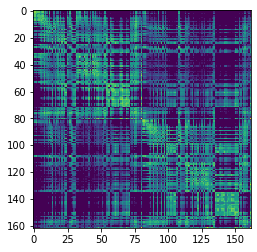

In [12]:
conn = connectivity.Connectivity.from_file("/data/fs/rechuv/tvb/connectivity.vep.zip")
imshow(log(conn.weights+1), interpolation='none')

WARNING  File 'hemispheres' not found in ZIP.


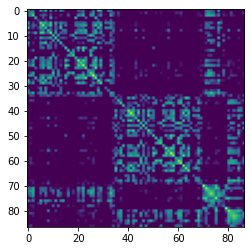

In [10]:
conn = connectivity.Connectivity.from_file('/data/chuv/tvb/connectivity.zip')
imshow(log(conn.weights+1))

In [6]:
%pip uninstall -y tvb-gdist

Found existing installation: tvb-gdist 2.1.0
Uninstalling tvb-gdist-2.1.0:
  Successfully uninstalled tvb-gdist-2.1.0
Note: you may need to restart the kernel to use updated packages.
